In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
data = pd.read_csv('E:\\Gold Price Prediction\\Gold_data.csv',parse_dates=['date'], index_col='date')
data

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


# Exploratory Data Analysis

In [3]:
data.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [4]:
data.tail()

,price
date,
2021-12-17,4394.4
2021-12-18,4389.5
2021-12-19,4389.5
2021-12-20,4354.1
2021-12-21,4346.5


In [5]:
list(data)

['price']

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.ndim

2

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2016-01-01 to 2021-12-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2182 non-null   float64
dtypes: float64(1)
memory usage: 34.1 KB


In [9]:
data.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2021-12-12', '2021-12-13', '2021-12-14', '2021-12-15',
               '2021-12-16', '2021-12-17', '2021-12-18', '2021-12-19',
               '2021-12-20', '2021-12-21'],
              dtype='datetime64[ns]', name='date', length=2182, freq=None)

In [10]:
data.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [11]:
#finding null value
data.isnull()
data.isnull().sum()

price    0
dtype: int64

In [13]:
data.skew()

price    0.637312
dtype: float64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


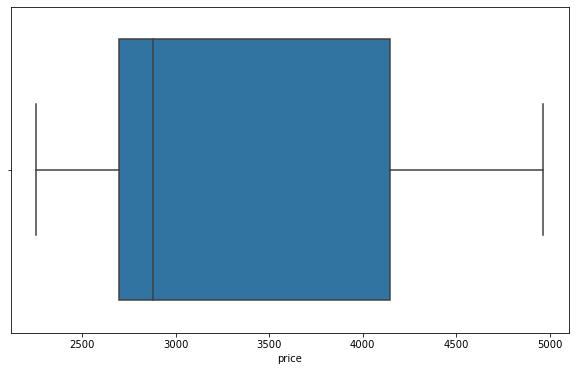

In [14]:
#Outlier Check
outliar = sns.boxplot(data['price'])

<AxesSubplot:xlabel='price', ylabel='Density'>

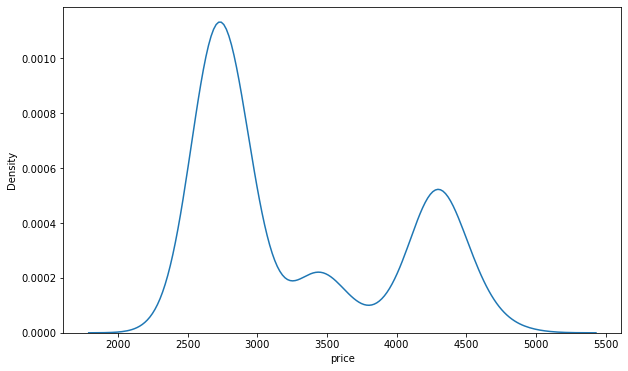

In [15]:
sns.kdeplot(data['price'])

<AxesSubplot:xlabel='date'>

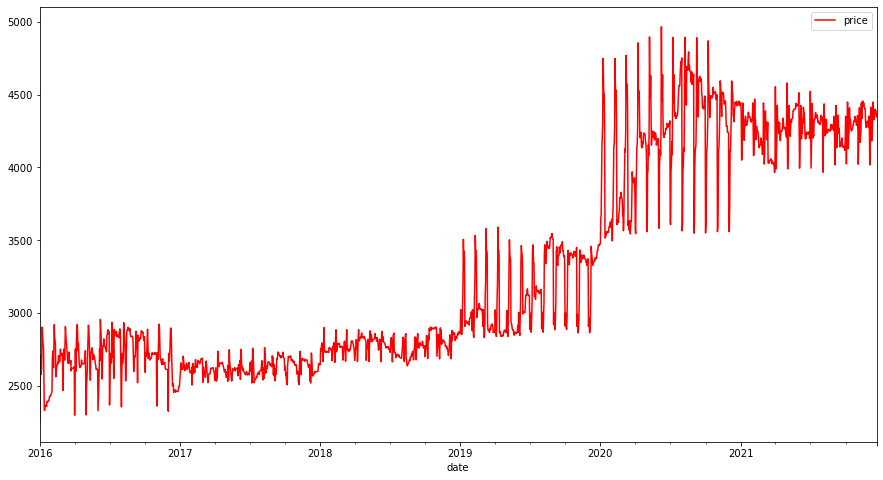

In [16]:
data.plot(figsize = (15,8),color = 'red')

<AxesSubplot:xlabel='date'>

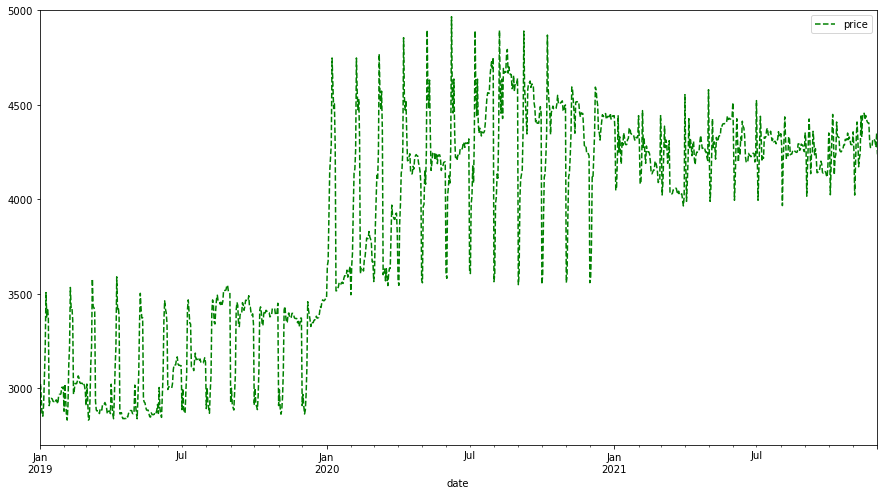

In [17]:
data.plot(xlim = ['2019-01-01','2021-12-01'],ylim = [2700,5000],figsize = (15,8),ls='--',c='green')

                  price
date                   
2016-12-31  2690.614162
2017-12-31  2626.676484
2018-12-31  2781.938082
2019-12-31  3150.210685
2020-12-31  4216.378689
2021-12-31  4266.871549
             price
date              
2016-12-31  2956.6
2017-12-31  2763.4
2018-12-31  2906.0
2019-12-31  3590.4
2020-12-31  4966.3
2021-12-31  4580.3
             price
date              
2016-12-31  2252.6
2017-12-31  2506.5
2018-12-31  2637.9
2019-12-31  2832.7
2020-12-31  3477.6
2021-12-31  3965.3


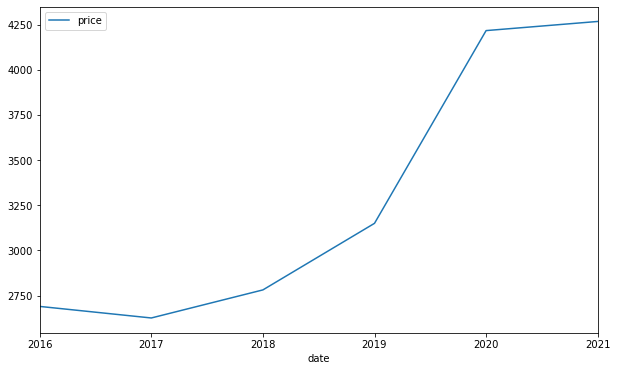

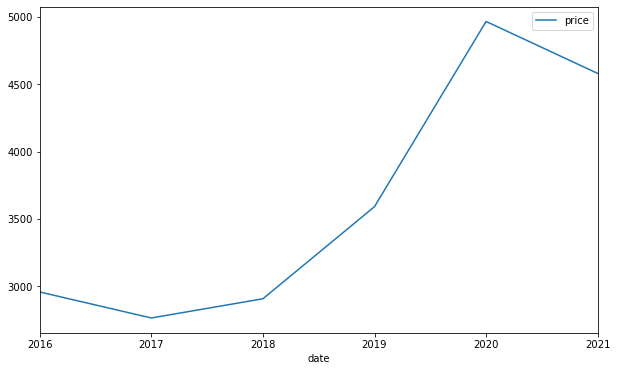

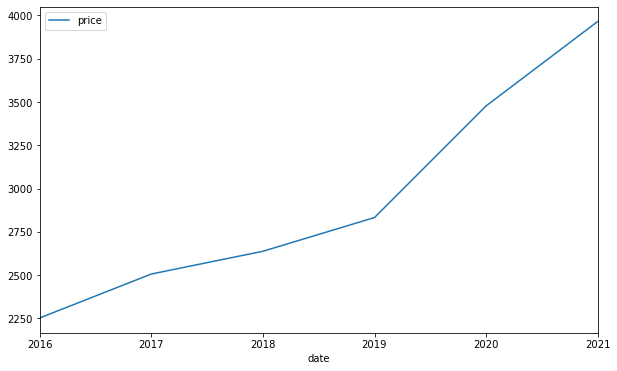

In [18]:
#checking the mean of maximum and minimum price yearwise
data.resample(rule='A').mean().plot()
data.resample(rule='A').max().plot()
data.resample(rule ='A').min().plot()
print(data.resample(rule='A').mean())
print(data.resample(rule='A').max())
print(data.resample(rule ='A').min())



(1) Here we can see in the price mean is not much deviated from past year price we can see the deviation only is 1K for the first three years but from 2019 the price started increasing.
(2) The min and max value shows that the maximum price was around 5000/- in the year 2020 and minimum price was around 2250/- in the year 2016.

In [19]:
data_temp = data.copy()
data_temp['Year'] = pd.DatetimeIndex(data_temp.index).year
data_temp['quarter'] = pd.DatetimeIndex(data_temp.index).quarter
data_temp['Month'] = pd.DatetimeIndex(data_temp.index).month
data_temp['Weeks'] = pd.DatetimeIndex(data_temp.index).week

C:\Users\hp\AppData\Local\Temp\ipykernel_34152\3984424621.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data_temp['Weeks'] = pd.DatetimeIndex(data_temp.index).week


<AxesSubplot:title={'center':'Seasonality of the Time Series by over the year'}, xlabel='Year', ylabel='price'>

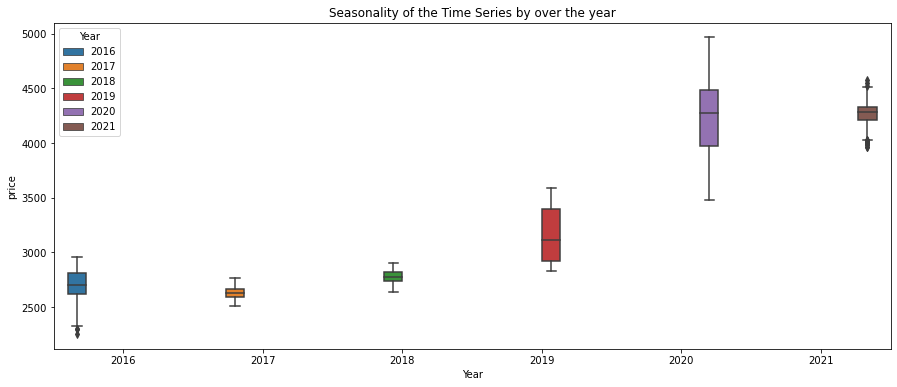

In [20]:
plt.figure(figsize=(15,6))
plt.title('Seasonality of the Time Series by over the year')
sns.boxplot(x='Year',y='price',hue='Year',data=data_temp)

In the year 2020 the price was at the peak and 2016 and 2021 we have some outliers.

<AxesSubplot:title={'center':'Seasonality of the Time Series quarter wise'}, xlabel='Year', ylabel='quarter'>

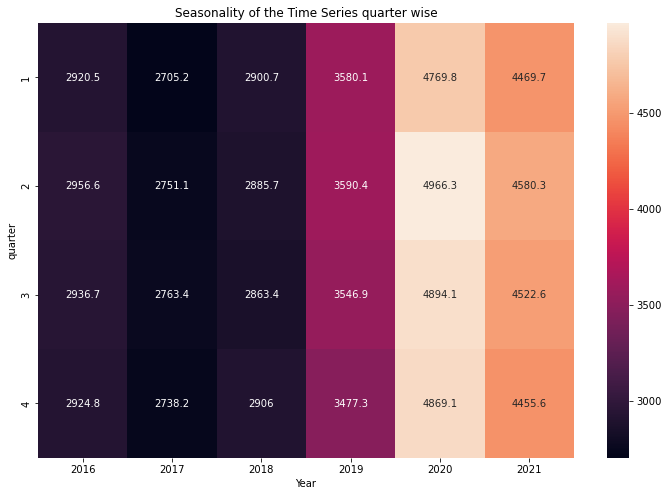

In [21]:
plt.figure(figsize=(12,8))
plt.title('Seasonality of the Time Series quarter wise')
heatmap=pd.pivot_table(data=data_temp,values='price',index=data_temp['quarter'],columns='Year',aggfunc='max',fill_value=0)
sns.heatmap(heatmap,annot = True ,fmt='g')

With the help of the above heatmap we come to know that the highest price was in the second quarter of the year 2020.
Second quater of every year has price hike, this price was the highest among the remaining 3 quarters of the respective year may be due to festive seasons.


<AxesSubplot:title={'center':'Seasonality of the Time Series month wise'}, xlabel='Month', ylabel='price'>

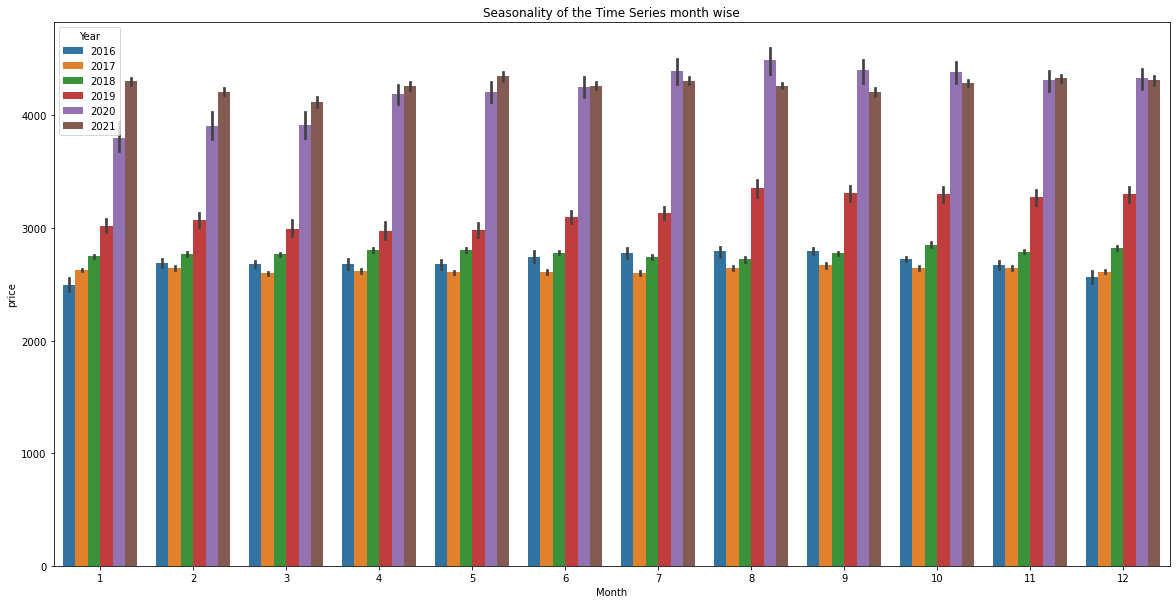

In [22]:
plt.figure(figsize=(20,10))
plt.title('Seasonality of the Time Series month wise')
sns.barplot(x='Month',y='price',hue='Year',data=data_temp)

If we see monthly wise then the highest price was in the month of August 2020 and lowest price was in January 2016.

<AxesSubplot:title={'center':'Seasonality of the Time Series week wise'}, xlabel='Weeks', ylabel='price'>

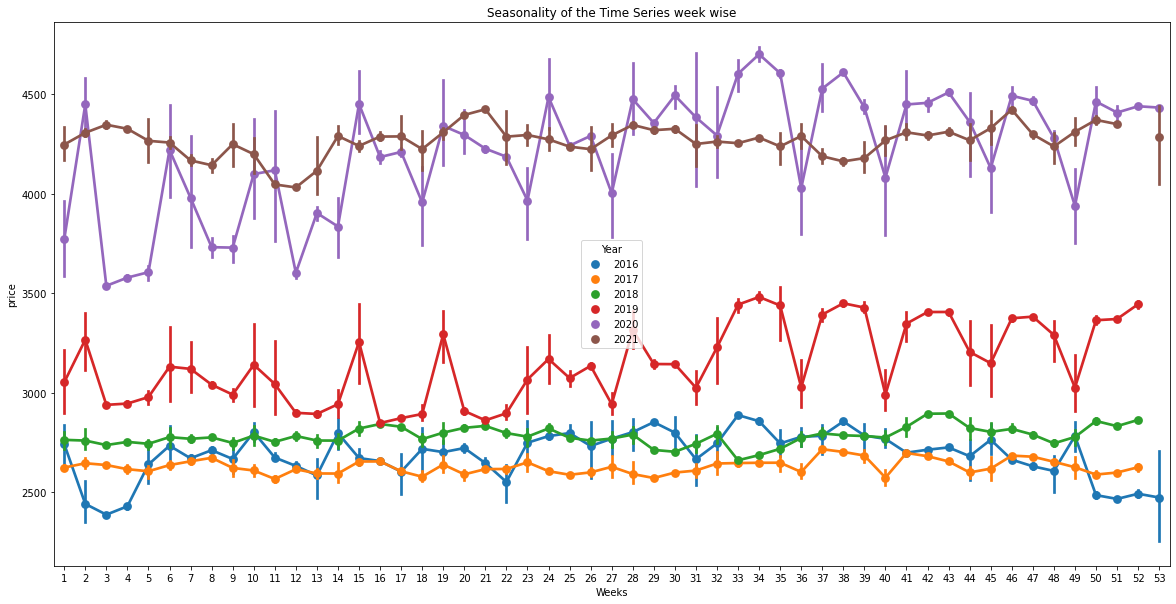

In [23]:
plt.figure(figsize=(20,10))
plt.title('Seasonality of the Time Series week wise')
sns.pointplot(x='Weeks',y='price',hue='Year',data=data_temp)

from the above plot it is clear that weekwise fluctuation is high as compared to monthly or quarterly basis.
Week 34 of every year has the highest price in the respective year.
In year 2016,2017,2018,2019 the price was in between 2500-3500 but in the last two years the price hiked exceptionally; almost double the price of previous year. This hike was not normal and it was so due to some external factor (covid).

# Additive Decomposition

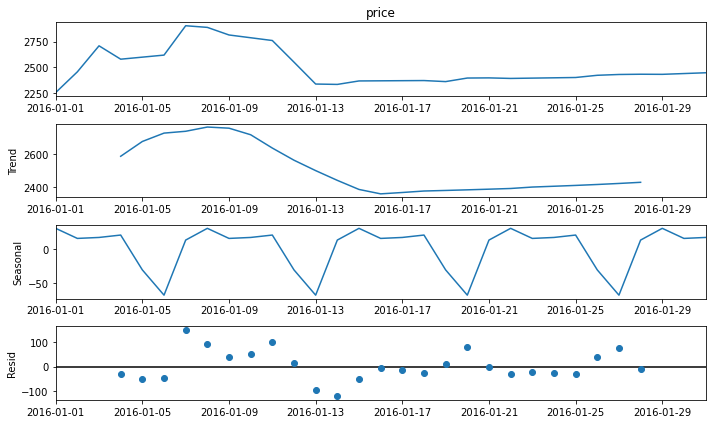

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data.price.iloc[:31], model='additive') 
fig = decomposition.plot()
plt.rcParams['figure.figsize'] = (20, 8)

Hence our data has weekly basis seasonality.

# ADFuller Test for stationarity

In [25]:
adf = adfuller(data["price"])[1]
print(f"p value:{adf.round(4)}", ", Series is Stationary" if adf <0.05 else ", Series is Non-Stationary")

p value:0.9241 , Series is Non-Stationary


From the above test we come to know that our data is not stationary. So to fit the model first we need to make our data stationary. We try to make our data stationary using differencing.

# Differencing

p value:0.0 , Series is Stationary


<AxesSubplot:xlabel='date'>

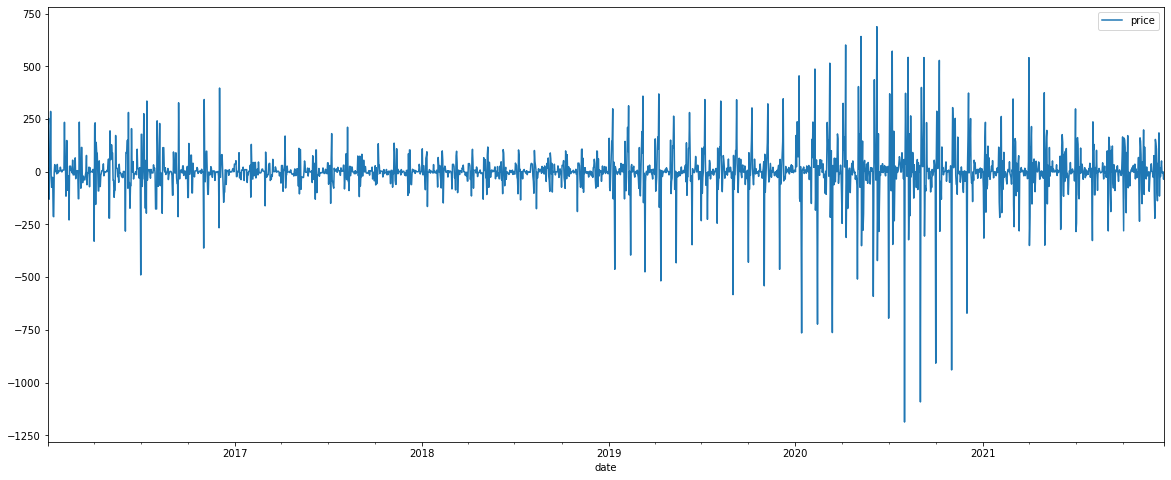

In [26]:
de_trended = data.diff(1).dropna()
adf2 = adfuller(de_trended)[1]
print(f"p value:{adf2}", ", Series is Stationary" if adf2 <0.05 else ", Series is Non-Stationary")
de_trended.plot()

# ACF Plots

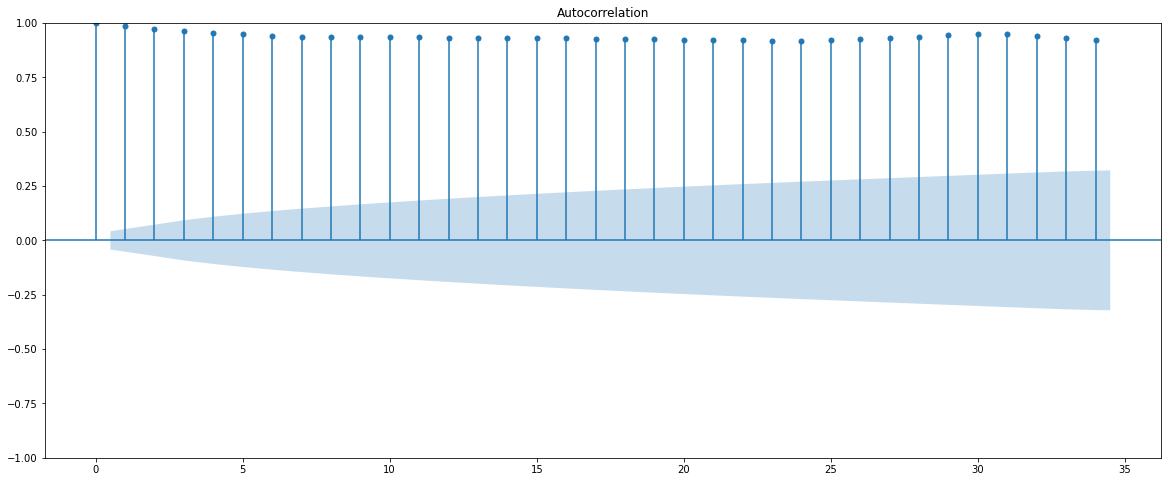

<Figure size 2880x720 with 0 Axes>

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)
plt.figure(figsize = (40,10))
plt.show()

This graph shows that our data is highly correlated and so we can't move to fit the model. 
Hence we will fit the plot this plot on the differenced data and then decide the ma values from it.

# ACF Plot after Differencing

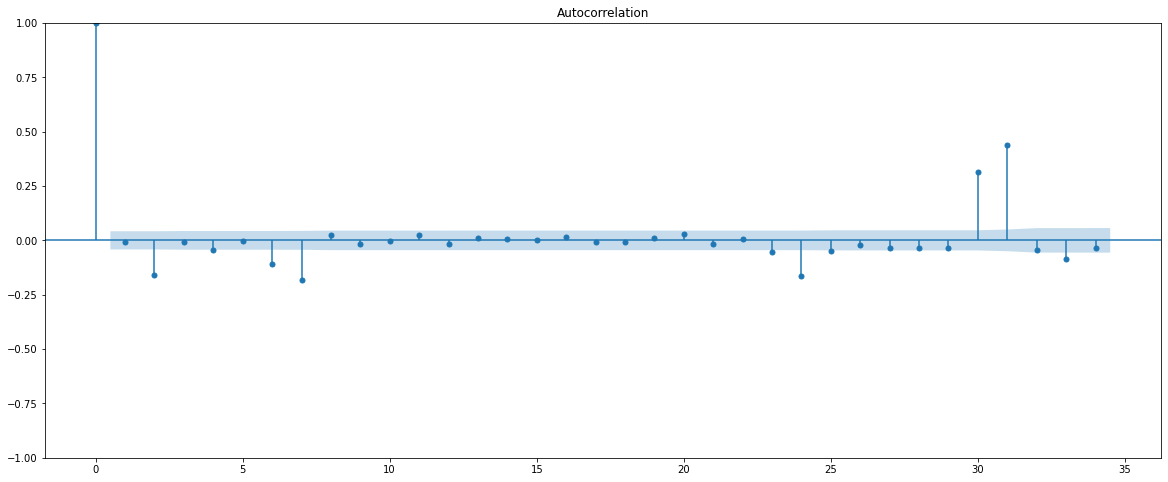

<Figure size 2880x720 with 0 Axes>

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(de_trended)
plt.figure(figsize = (40,10))
plt.show()

From the above graph the acceptable values of q are 0,2,4,6,7

# PACF Plot

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


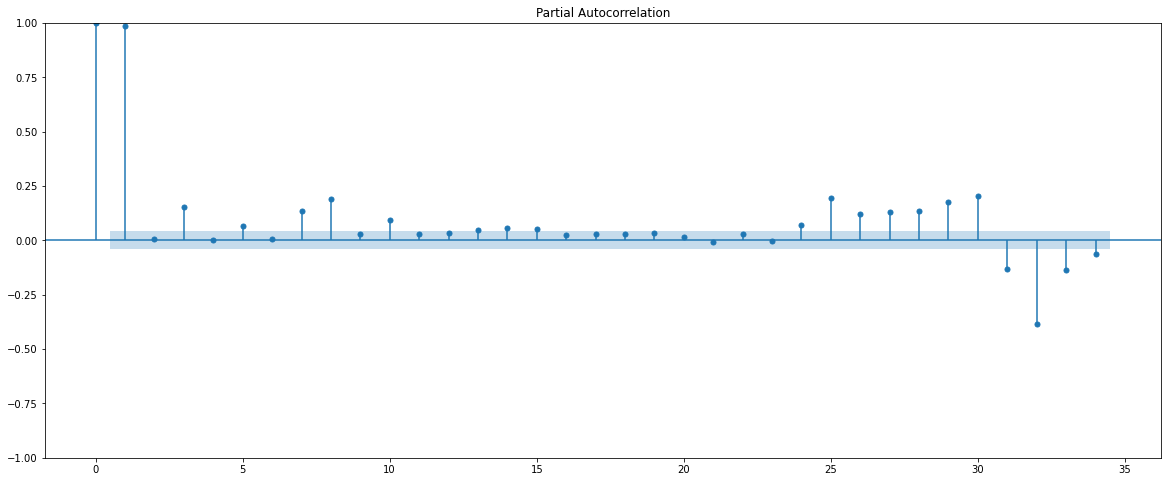

<Figure size 2880x720 with 0 Axes>

In [29]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data)
plt.figure(figsize = (40,10))
plt.show()

From this graph we can have our p value as 1,3,5,7,8

# PACF Plot after Differencing

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


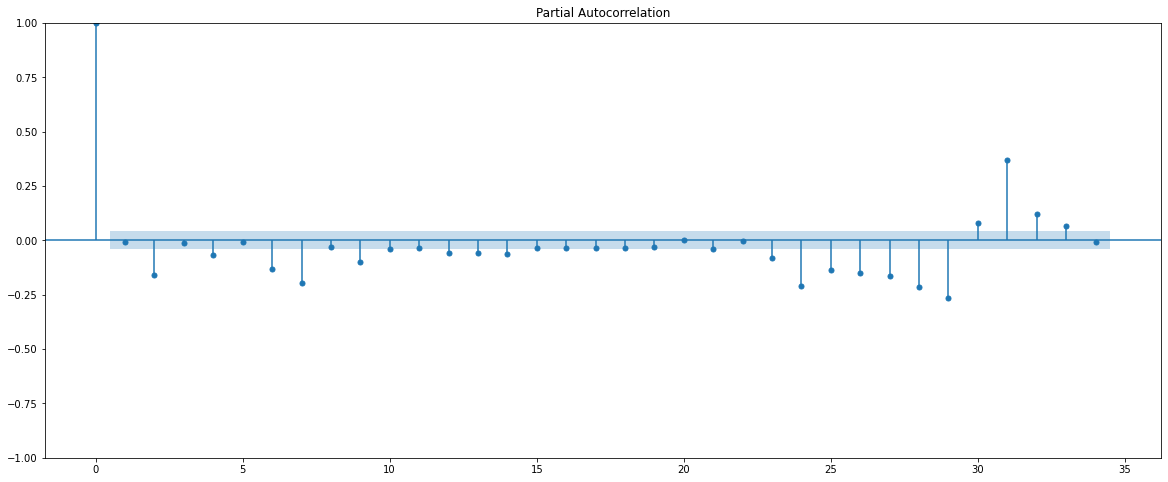

<Figure size 2880x720 with 0 Axes>

In [30]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(de_trended)
plt.figure(figsize = (40,10))
plt.show()

This graph gives us the P value as 0,2,4,6,7

# Train and Test Split

We split our data into train and test in 70-30 ratio

In [31]:
data_train = data.iloc[:1530,0:]
data_train.tail()

,price
date,
2020-03-05,4127.5
2020-03-06,4106.5
2020-03-07,4255.0
2020-03-08,4769.8
2020-03-09,4553.6


In [32]:
data_test = data.iloc[1530:,0:]
data_test.head()

,price
date,
2020-03-10,4472.6
2020-03-11,4572.6
2020-03-12,4364.6
2020-03-13,3601.7
2020-03-14,3631.3


# SARIMA Model

In [33]:
best_model = SARIMAX(data_train, order=(2, 0, 2), seasonal_order=(2, 1, 0, 12)).fit()
print(best_model.summary())

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                               price   No. Observations:                 1530
Model:             SARIMAX(2, 0, 2)x(2, 1, [], 12)   Log Likelihood               -9119.255
Date:                             Fri, 29 Jul 2022   AIC                          18252.509
Time:                                     10:22:53   BIC                          18289.785
Sample:                                 01-01-2016   HQIC                         18266.388
                                      - 03-09-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5142      0.057     26.427      0.000       1.402       1.626
ar.L2         -0.6481      

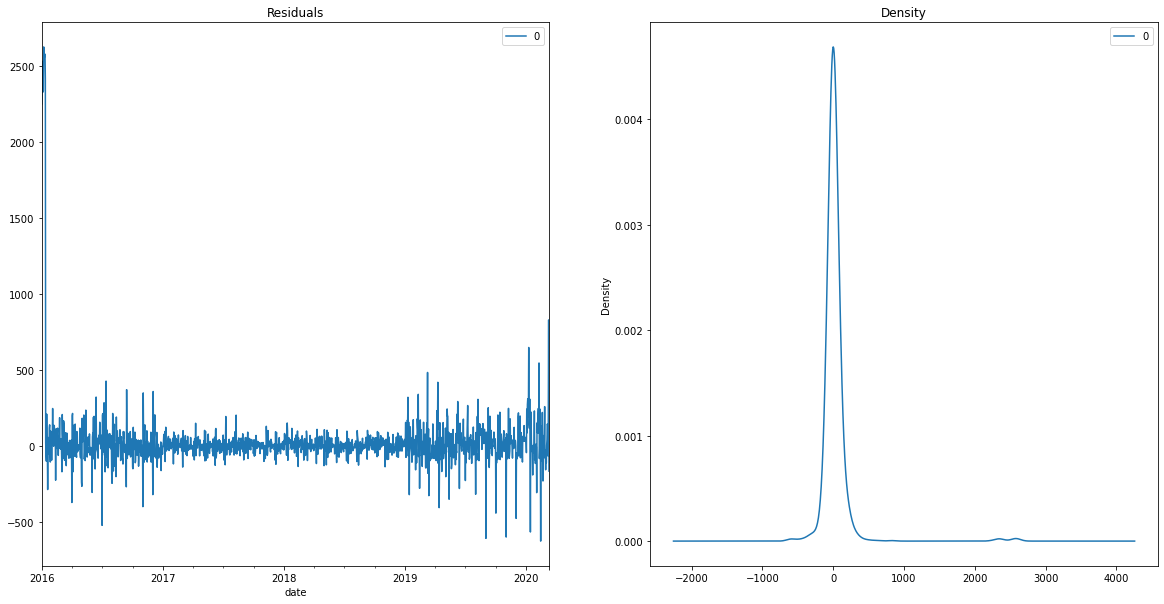

date
2016-01-01    2252.600000
2016-01-02    2358.070523
2016-01-03    2533.543502
2016-01-04    2341.827313
2016-01-05    2331.178189
                 ...     
2020-03-05     135.343573
2020-03-06     -67.191975
2020-03-07     180.206654
2020-03-08     829.309323
2020-03-09    -167.046413
Length: 1530, dtype: float64


In [34]:
residuals2 = pd.DataFrame(best_model.resid)
fig, ax = plt.subplots(1,2)
residuals2.plot(title="Residuals", ax=ax[0])
residuals2.plot(kind='kde', title='Density', ax=ax[1],figsize=(20,10))
plt.show()
print(best_model.resid)

# Actual Vs. Forecast

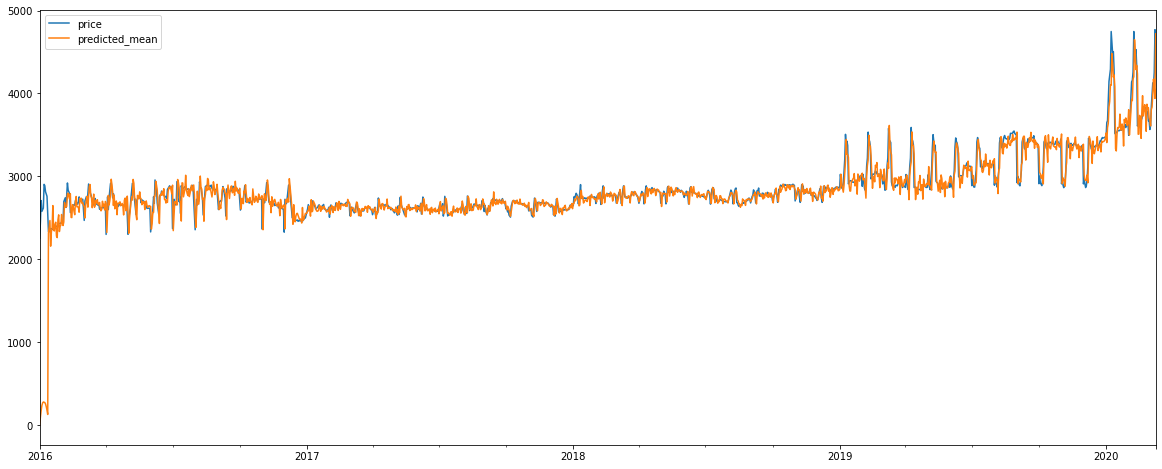

In [35]:
forecast = best_model.predict(dynamic=False)
pd.concat([data_train,forecast],axis=1).plot()
figsize = (20,10)
plt.show()

In [36]:
step=652
preds_N = best_model.forecast(step,n_periods=12)
print(preds_N)

2020-03-10    4477.172637
2020-03-11    4331.516548
2020-03-12    4191.372513
2020-03-13    3996.248427
2020-03-14    3907.224157
                 ...     
2021-12-17    4129.741719
2021-12-18    4097.542172
2021-12-19    3999.753718
2021-12-20    3932.931017
2021-12-21    3811.933159
Freq: D, Name: predicted_mean, Length: 652, dtype: float64


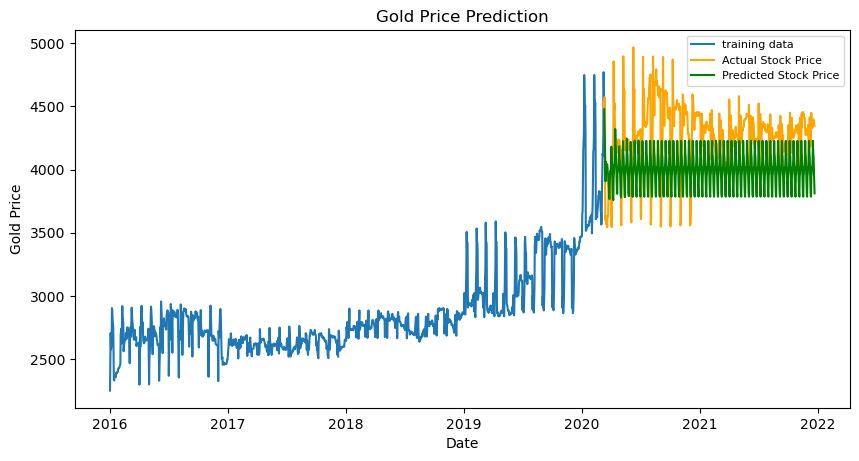

In [37]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(data_train, label='training data')
plt.plot(data_test, color = 'orange', label='Actual Stock Price')
plt.plot(preds_N, color = 'green',label='Predicted Stock Price')
plt.title('Gold Price Prediction')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend(loc='best', fontsize=8)
plt.show()

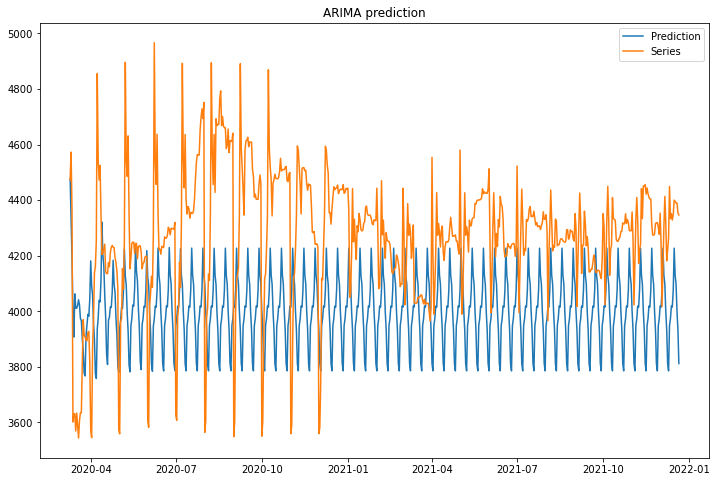

In [38]:
plt.figure(figsize=(12,8))
plt.plot(preds_N, label="Prediction")
plt.plot(data_test, label="Series")
plt.title("ARIMA prediction")
plt.legend()
plt.show()

In [39]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
print(np.sqrt(metrics.mean_squared_error(data_test,preds_N)))
print(mean_absolute_percentage_error(data_test,preds_N)*100)

376.39937357990004
7.454232361384534


In [1]:
import pickle
pickle_out=open("best_model.pkl","wb")
pickle.dump(best_model, pickle_out)
pickle_out.close()

NameError: name 'best_model' is not defined